<a href="https://colab.research.google.com/github/AlanItzep/AplicacionJS/blob/master/Deeplabv3_ResNet101_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing DeepLabV3 with a ResNet-101 backbone
First of all, I want to use PyTorch to this project.
We can use this library on Colab, I'm going to explain simple steps to do it.

It is necessary to fill some requirements, as Python 3 and pip (or pip3). This is all due to the installation of Pytorch library. 
One advantage using PyTorch on Colab is that we can take advantage of CUDA's.

In [0]:
!python --version

Python 3.6.9


In [0]:
!pip3 --version

pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [0]:
!pip install torch torchvision

While we finish the installation process, we can do a little proof:

In [0]:
from __future__ import print_function
import torch
x = torch.rand(5,3)

In [0]:
print(x)

tensor([[0.5121, 0.3303, 0.9662],
        [0.9263, 0.3065, 0.7733],
        [0.2186, 0.2507, 0.1603],
        [0.6841, 0.9060, 0.6031],
        [0.6864, 0.7590, 0.0218]])


Ok, we are ready to beging the resolve the challenge:

In [0]:
import torch 
model = torch.hub.load('pytorch/vision:v0.5.0','deeplabv3_resnet101',pretrained=True)
model.eval()

import urllib.request
url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg","dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url,filename)

from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
	input_batch = input_batch.to('cuda')
	model.to('cuda')

with torch.no_grad():
	output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

Downloading: "https://github.com/pytorch/vision/archive/v0.5.0.zip" to /root/.cache/torch/hub/v0.5.0.zip
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


In [0]:
palette = torch.tensor([2 ** 25-1,2 ** 15-1, 2** 21-1])
colors = torch.as_tensor([i for i in range(21)])[:, None]* palette
colors = (colors % 255).numpy().astype("uint8")

r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)


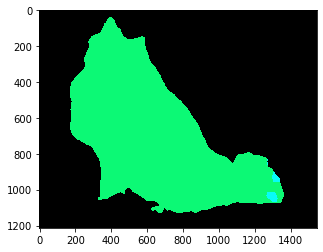

In [0]:
import matplotlib.pyplot as plt
plt.imshow(r)

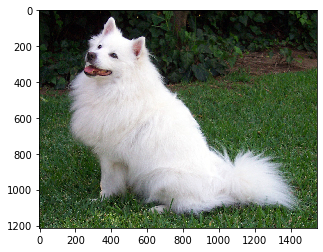

In [0]:
plt.imshow(input_image)

In [41]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ppp.jpeg to ppp.jpeg
User uploaded file "ppp.jpeg" with length 309562 bytes


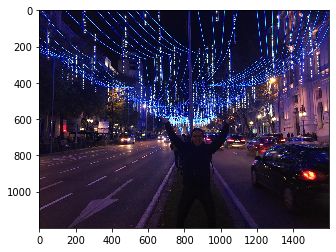

In [42]:
input_image_2 = Image.open('ppp.jpeg')
plt.imshow(input_image_2)

In [0]:
preprocess = transforms.Compose([
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])
input_tensor = preprocess(input_image_2)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
	input_batch = input_batch.to('cuda')
	model.to('cuda')

with torch.no_grad():
	output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [0]:
palette = torch.tensor([2 ** 25-1,2 ** 15-1, 2** 21-1])
colors = torch.as_tensor([i for i in range(21)])[:, None]* palette
colors = (colors % 255).numpy().astype("uint8")

r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

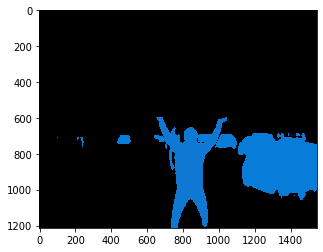

In [45]:
plt.imshow(r)